In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd



In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import explained_variance_score, mean_absolute_error, mean_squared_error, accuracy_score, median_absolute_error,r2_score

 Leer el conjunto de datos desde el archivo Excel

In [24]:
df = pd.read_excel('dataset.xlsx')
# Obtener el número de filas
num_filas = df.shape[0]
print(f'Número de instancias: {num_filas}')
# Obtener el número de columnas
num_columnas = df.shape[1]
print(f'Número de propiedades: {num_columnas}')

# Obtener los nombres de las columnas
nombres_columnas = df.columns
print('Nombres de propiedades:', nombres_columnas)
# Obtener estadísticas resumidas de las propiedades numéricas
resumen_estadisticas = df.describe()
print('Estadísticas resumidas:\n', resumen_estadisticas)


Número de instancias: 54
Número de propiedades: 25
Nombres de propiedades: Index(['month', 'lote', 'E1', 'E2', 'E3', 'E4', 'E5', 'Cherelles', 'qq',
       'temp', 'Evapotranspiration', 'Evapotranspiration_Crop', 'Nvdi',
       'Relat_Hum_Max_Temp', 'Temp_Air_Max', 'Temp_Air_Min', 'Dew_Temp_Max',
       'Precipitacion', 'Precipitacion_Hours', 'Sea_Level_Pressure',
       'Vapor_Pressure_Deficit', 'Dew_Temp_Mean', 'Crop_Water_Demand',
       'Sunshine_Duration', 'year'],
      dtype='object')
Estadísticas resumidas:
            month        lote          E1          E2          E3          E4  \
count  54.000000   54.000000   54.000000   54.000000   54.000000   54.000000   
mean    4.740741   95.240741   66.296296   48.537037   45.740741   37.037037   
std     2.316350  102.605295  110.447568   60.074392   45.542924   37.894572   
min     3.000000   12.000000    0.000000    0.000000    0.000000    0.000000   
25%     3.000000   22.000000    5.250000    7.250000   11.000000    6.250000   

 Visualizar relaciones entre las variables mediante un pairplot

Convirtiendo en variables categoricas el mes y año

In [25]:
df = pd.get_dummies(df, columns=['month'], prefix='month')
# Suponiendo que 'anio' es la columna con los números de año
df = pd.get_dummies(df, columns=['year'], prefix='year')
df = pd.get_dummies(df, columns=['lote'], prefix='lote')
#df.to_excel("DatasetCat",index=False)
# Obtener los nombres de las columnas
nombres_columnas = df.columns
print('Nombres de propiedades:', nombres_columnas)

Nombres de propiedades: Index(['E1', 'E2', 'E3', 'E4', 'E5', 'Cherelles', 'qq', 'temp',
       'Evapotranspiration', 'Evapotranspiration_Crop', 'Nvdi',
       'Relat_Hum_Max_Temp', 'Temp_Air_Max', 'Temp_Air_Min', 'Dew_Temp_Max',
       'Precipitacion', 'Precipitacion_Hours', 'Sea_Level_Pressure',
       'Vapor_Pressure_Deficit', 'Dew_Temp_Mean', 'Crop_Water_Demand',
       'Sunshine_Duration', 'month_3', 'month_5', 'month_6', 'month_9',
       'month_10', 'month_12', 'year_2023', 'lote_12', 'lote_14', 'lote_18',
       'lote_19', 'lote_21', 'lote_22', 'lote_27', 'lote_33', 'lote_35',
       'lote_37', 'lote_41', 'lote_42', 'lote_43', 'lote_46', 'lote_48',
       'lote_49', 'lote_115', 'lote_117', 'lote_210', 'lote_214', 'lote_218',
       'lote_311', 'lote_312', 'lote_317'],
      dtype='object')


In [11]:
sns.pairplot(df, diag_kind='kde')
plt.show()

matriz de correlación para cuantificar la relación lineal entre las variables:

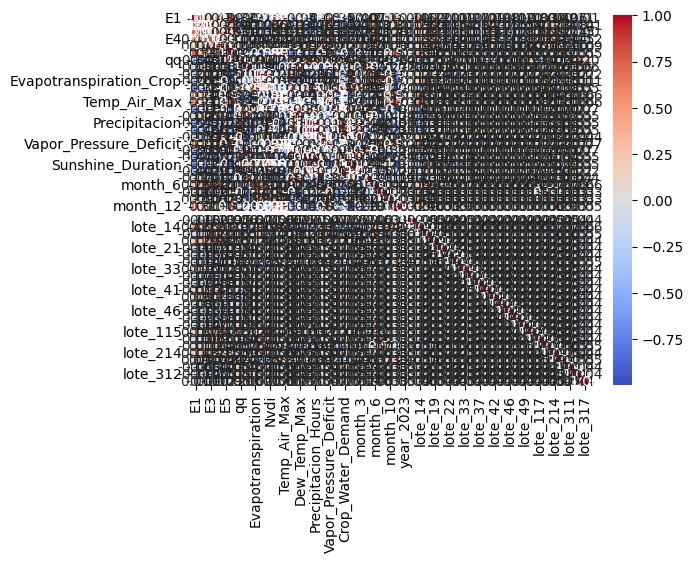

In [26]:
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Aplicando  SVM y egresion lineal simple en un enfoque de regresion lineal

In [27]:
X = df.drop(['qq'], axis=1)
y = df['qq']

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División de datos
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
# Crear un DataFrame para almacenar las métricas

# SVM Regresión
svm_regressor = SVR()
svm_regressor.fit(X_train, y_train)
svm_predictions = svm_regressor.predict(X_test)
svm_mse = mean_squared_error(y_test, svm_predictions)
svm_r2 = r2_score(y_test, svm_predictions)
mae = mean_absolute_error(y_test, svm_predictions)
rmse = mean_squared_error(y_test, svm_predictions, squared=False)
explained_variance = explained_variance_score(y_test, svm_predictions)
medae = median_absolute_error(y_test, svm_predictions)

# Regresión Lineal Simple
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)
linear_predictions = linear_regressor.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_predictions)
linear_r2 = r2_score(y_test, linear_predictions)
mae = mean_absolute_error(y_test, linear_predictions)
rmse = mean_squared_error(y_test, linear_predictions, squared=False)
explained_variance = explained_variance_score(y_test, linear_predictions)
medae = median_absolute_error(y_test, linear_predictions)


Graficos de la prediccion

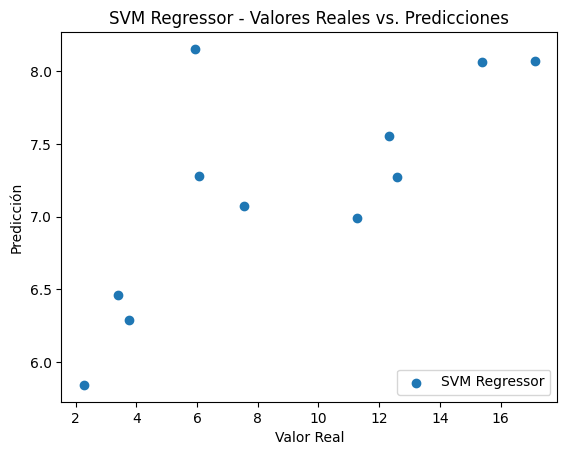

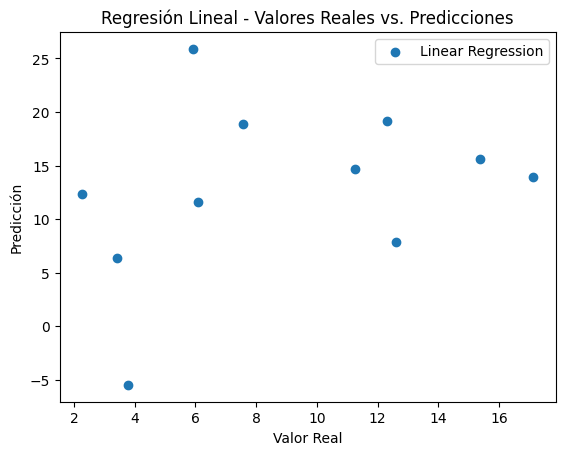

In [28]:
# Gráfico para SVM Regressor
plt.scatter(y_test, svm_predictions, label='SVM Regressor')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('SVM Regressor - Valores Reales vs. Predicciones')
plt.legend()
plt.show()

# Gráfico para Regresión Lineal
plt.scatter(y_test, linear_predictions, label='Linear Regression')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Regresión Lineal - Valores Reales vs. Predicciones')
plt.legend()
plt.show()

# Regresion no lineal
Random Forest

In [29]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Crear un modelo de Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
rf_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
rf_predictions = rf_regressor.predict(X_test)


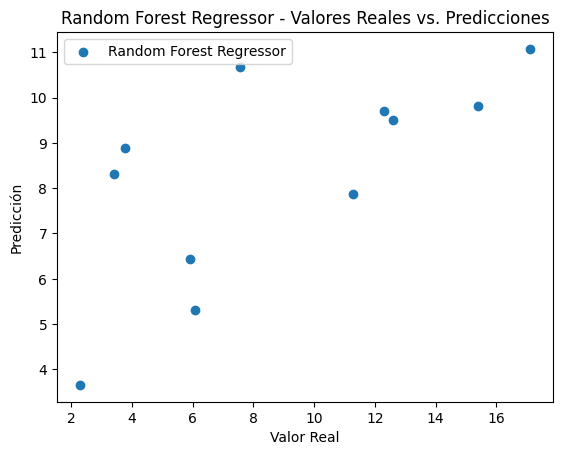

In [30]:
# Gráfico para Random Forest Regressor
plt.scatter(y_test, rf_predictions, label='Random Forest Regressor')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Random Forest Regressor - Valores Reales vs. Predicciones')
plt.legend()
plt.show()


Gradient Boosting

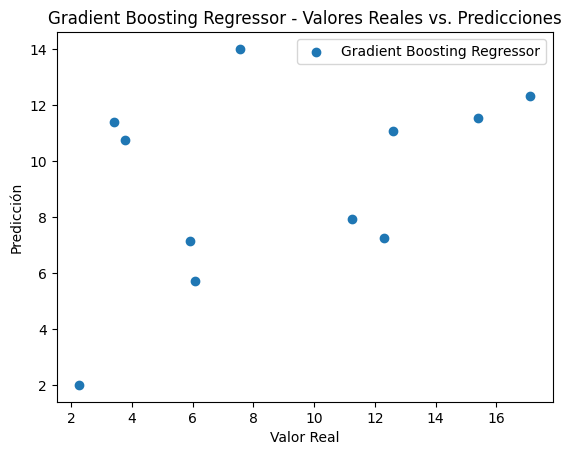

In [31]:
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt

# Crear un modelo de Gradient Boosting Regressor
gb_regressor = GradientBoostingRegressor(n_estimators=100, random_state=42)

# Entrenar el modelo
gb_regressor.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
gb_predictions = gb_regressor.predict(X_test)

# Gráfico para Gradient Boosting Regressor
plt.scatter(y_test, gb_predictions, label='Gradient Boosting Regressor')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Gradient Boosting Regressor - Valores Reales vs. Predicciones')
plt.legend()
plt.show()


RNN

Epoch 1/50
2/2 [==============================] - 1s 227ms/step - loss: 101.5659 - val_loss: 130.9240
Epoch 2/50
2/2 [==============================] - 0s 31ms/step - loss: 100.8140 - val_loss: 130.0388
Epoch 3/50
2/2 [==============================] - 0s 32ms/step - loss: 100.1176 - val_loss: 129.1250
Epoch 4/50
2/2 [==============================] - 0s 36ms/step - loss: 99.4319 - val_loss: 128.1504
Epoch 5/50
2/2 [==============================] - 0s 47ms/step - loss: 98.7420 - val_loss: 127.0508
Epoch 6/50
2/2 [==============================] - 0s 44ms/step - loss: 97.9249 - val_loss: 125.7308
Epoch 7/50
2/2 [==============================] - 0s 35ms/step - loss: 96.9707 - val_loss: 124.1845
Epoch 8/50
2/2 [==============================] - 0s 33ms/step - loss: 95.7449 - val_loss: 122.3040
Epoch 9/50
2/2 [==============================] - 0s 44ms/step - loss: 94.2545 - val_loss: 119.6913
Epoch 10/50
2/2 [==============================] - 0s 75ms/step - loss: 92.0491 - val_loss: 115.

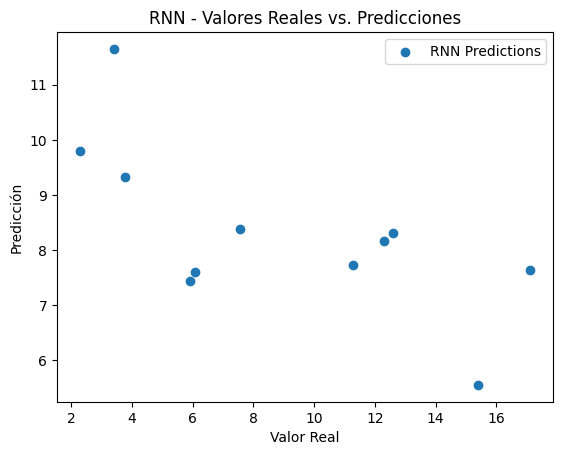

In [32]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que X_train y y_train son tus datos de entrenamiento
# Asegúrate de que tus datos estén en un formato adecuado para una RNN

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# División de datos
X_train_rnn, X_val_rnn, y_train_rnn, y_val_rnn = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)

# Construir el modelo RNN
model = tf.keras.Sequential([
    tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=(X_train_rnn.shape[1], 1)),
    tf.keras.layers.Dense(1)  # Capa de salida para regresión lineal
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Reshape de los datos para que sean compatibles con la entrada de la RNN
X_train_rnn_reshaped = X_train_rnn.reshape((X_train_rnn.shape[0], X_train_rnn.shape[1], 1))
X_val_rnn_reshaped = X_val_rnn.reshape((X_val_rnn.shape[0], X_val_rnn.shape[1], 1))

# Entrenar el modelo
history = model.fit(X_train_rnn_reshaped, y_train_rnn, epochs=50, batch_size=32, validation_data=(X_val_rnn_reshaped, y_val_rnn))

# Realizar predicciones en el conjunto de prueba
X_test_rnn_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
rnn_predictions = model.predict(X_test_rnn_reshaped)

# Gráfico para RNN
plt.scatter(y_test, rnn_predictions, label='RNN Predictions')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('RNN - Valores Reales vs. Predicciones')
plt.legend()
plt.show()


Epoch 1/50
2/2 [==============================] - 1s 284ms/step - loss: 101.2879 - val_loss: 131.9990
Epoch 2/50
2/2 [==============================] - 0s 39ms/step - loss: 100.9129 - val_loss: 131.4055
Epoch 3/50
2/2 [==============================] - 0s 41ms/step - loss: 100.5016 - val_loss: 130.7521
Epoch 4/50
2/2 [==============================] - 0s 64ms/step - loss: 100.0514 - val_loss: 130.0091
Epoch 5/50
2/2 [==============================] - 0s 42ms/step - loss: 99.5212 - val_loss: 129.1300
Epoch 6/50
2/2 [==============================] - 0s 40ms/step - loss: 98.8736 - val_loss: 128.0399
Epoch 7/50
2/2 [==============================] - 0s 41ms/step - loss: 98.0105 - val_loss: 126.5313
Epoch 8/50
2/2 [==============================] - 0s 41ms/step - loss: 96.7127 - val_loss: 124.1833
Epoch 9/50
2/2 [==============================] - 0s 50ms/step - loss: 112.6399 - val_loss: 125.3385
Epoch 10/50
2/2 [==============================] - 0s 45ms/step - loss: 95.8017 - val_loss: 12

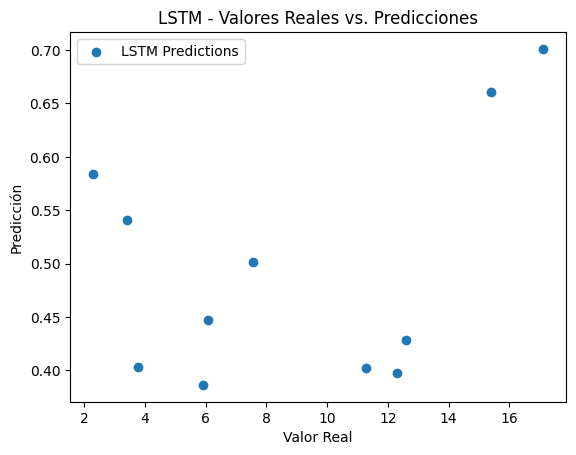

In [33]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Supongamos que X_train y y_train son tus datos de entrenamiento
# Asegúrate de que tus datos estén en un formato adecuado para una LSTM

# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# División de datos
X_train_lstm, X_val_lstm, y_train_lstm, y_val_lstm = train_test_split(X_scaled, y_train, test_size=0.2, random_state=42)

# Reshape de los datos para que sean compatibles con la entrada de la LSTM
X_train_lstm_reshaped = X_train_lstm.reshape((X_train_lstm.shape[0], X_train_lstm.shape[1], 1))
X_val_lstm_reshaped = X_val_lstm.reshape((X_val_lstm.shape[0], X_val_lstm.shape[1], 1))

# Construir el modelo LSTM
model = tf.keras.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], 1)),
    tf.keras.layers.Dense(1)  # Capa de salida para regresión lineal
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train_lstm_reshaped, y_train_lstm, epochs=50, batch_size=32, validation_data=(X_val_lstm_reshaped, y_val_lstm))

# Realizar predicciones en el conjunto de prueba
X_test_lstm_reshaped = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
lstm_predictions = model.predict(X_test_lstm_reshaped)

# Gráfico para LSTM
plt.scatter(y_test, lstm_predictions, label='LSTM Predictions')
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('LSTM - Valores Reales vs. Predicciones')
plt.legend()
plt.show()


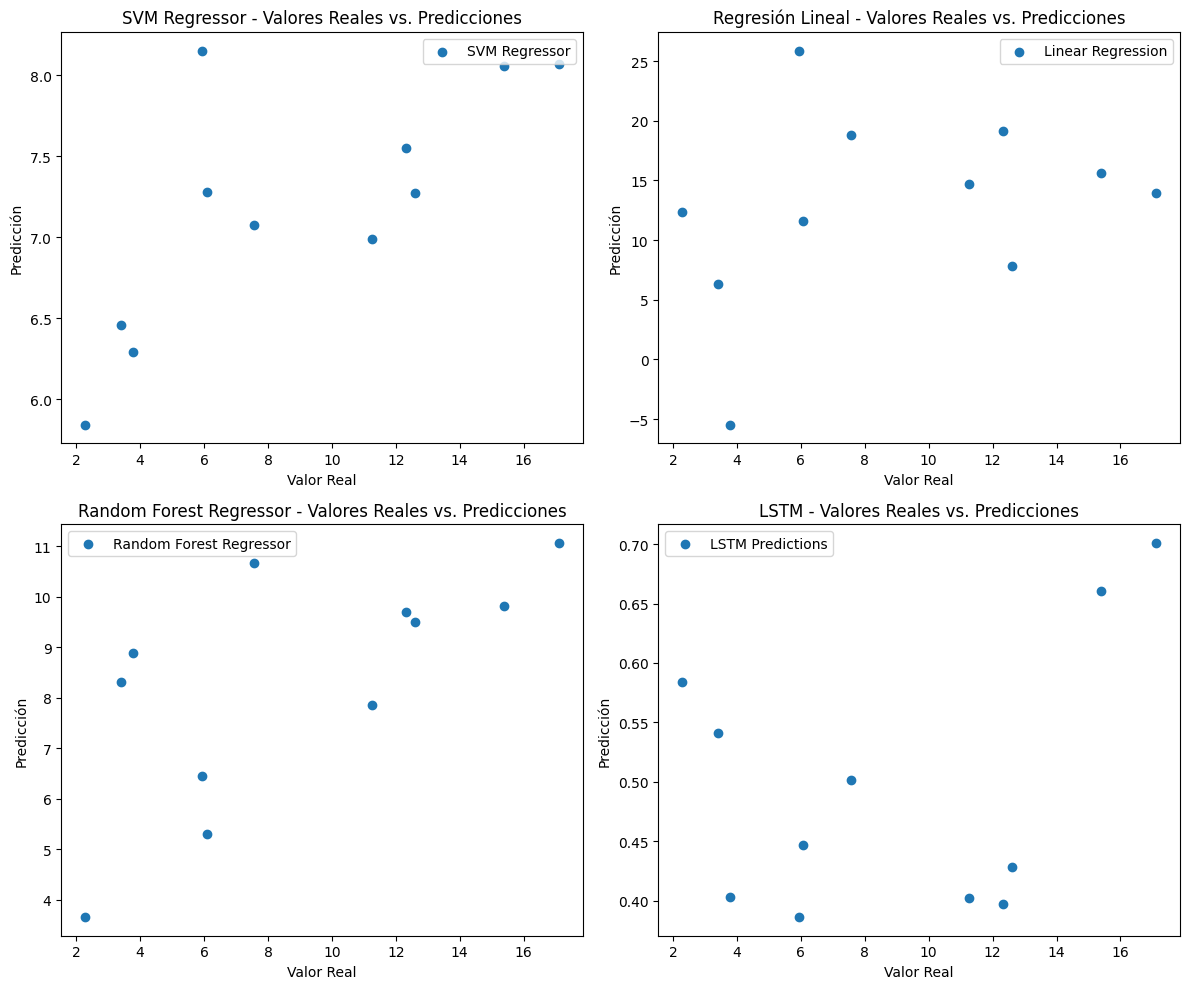

In [34]:
# Crear subgráficos
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Gráfico para SVM Regressor
axes[0, 0].scatter(y_test, svm_predictions, label='SVM Regressor')
axes[0, 0].set_xlabel('Valor Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].set_title('SVM Regressor - Valores Reales vs. Predicciones')
axes[0, 0].legend()

# Gráfico para Regresión Lineal
axes[0, 1].scatter(y_test, linear_predictions, label='Linear Regression')
axes[0, 1].set_xlabel('Valor Real')
axes[0, 1].set_ylabel('Predicción')
axes[0, 1].set_title('Regresión Lineal - Valores Reales vs. Predicciones')
axes[0, 1].legend()

# Gráfico para Random Forest Regressor
axes[1, 0].scatter(y_test, rf_predictions, label='Random Forest Regressor')
axes[1, 0].set_xlabel('Valor Real')
axes[1, 0].set_ylabel('Predicción')
axes[1, 0].set_title('Random Forest Regressor - Valores Reales vs. Predicciones')
axes[1, 0].legend()

# Gráfico para LSTM
axes[1, 1].scatter(y_test, lstm_predictions, label='LSTM Predictions')
axes[1, 1].set_xlabel('Valor Real')
axes[1, 1].set_ylabel('Predicción')
axes[1, 1].set_title('LSTM - Valores Reales vs. Predicciones')
axes[1, 1].legend()

# Ajustar el diseño de los subgráficos
plt.tight_layout()
plt.show()

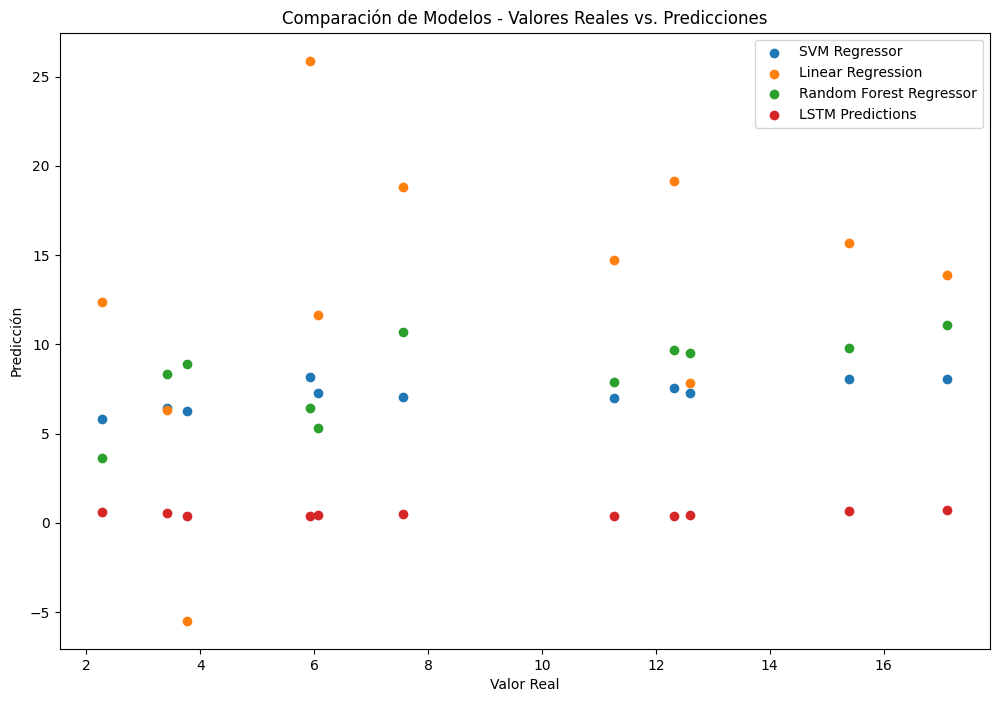

In [35]:
import matplotlib.pyplot as plt

# Crear un solo gráfico
plt.figure(figsize=(12, 8))

# Gráfico para SVM Regressor
plt.scatter(y_test, svm_predictions, label='SVM Regressor')

# Gráfico para Regresión Lineal
plt.scatter(y_test, linear_predictions, label='Linear Regression')

# Gráfico para Random Forest Regressor
plt.scatter(y_test, rf_predictions, label='Random Forest Regressor')

# Gráfico para LSTM
plt.scatter(y_test, lstm_predictions, label='LSTM Predictions')

# Ajustar etiquetas y leyenda
plt.xlabel('Valor Real')
plt.ylabel('Predicción')
plt.title('Comparación de Modelos - Valores Reales vs. Predicciones')
plt.legend()

# Mostrar el gráfico
plt.show()


In [37]:
import matplotlib.pyplot as plt

# Crear un solo gráfico
plt.figure(figsize=(12, 8))

# Gráfico para SVM Regressor
plt.plot(df['month'], svm_predictions, label='SVM Regressor', marker='o')

# Gráfico para Regresión Lineal
plt.plot(df['month'], linear_predictions, label='Linear Regression', marker='o')

# Gráfico para Random Forest Regressor
plt.plot(df['month'], rf_predictions, label='Random Forest Regressor', marker='o')

# Gráfico para LSTM
plt.plot(df['month'], lstm_predictions, label='LSTM Predictions', marker='o')

# Valores reales
plt.plot(df['month'], df['real_values'], label='Real Values', linestyle='--', marker='o')

# Ajustar etiquetas y leyenda
plt.xlabel('Mes')
plt.ylabel('Valor')
plt.title('Comparación de Modelos - Valores Reales vs. Predicciones por Mes')
plt.legend()

# Mostrar el gráfico
plt.show()


KeyError: 'month'

<Figure size 1200x800 with 0 Axes>